
# Manual Fit of Sonar Dataset

In [12]:
import numpy as np
import os
import time
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
## Importing required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

# Define function for plotting history
import matplotlib.pyplot as plt
def plot_metrics(history, metrics =  ['loss', 'acc']):
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    #plt.figsize=(20,10)
    plt.subplot(1,len(metrics),n+1)
    plt.tight_layout(pad=2)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()
    
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(8,8))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

Using plaidml.keras.backend backend.


## Import sonar dataset

In [13]:
    
import pandas as pd
df = pd.read_csv('sonar.csv', header=None)
X_test = df.sample(frac=0.20, replace=True, random_state=1)
Y_test = X_test[60]
X_test.drop([60],axis=1, inplace=True)
X_test.head()
X_train = df.drop(X_test.index)
Y_train = X_train[60]
X_train.drop([60],axis=1, inplace=True)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062


In [14]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
print("X_test shape: ",X_test.shape)
print("X_train shape: ",X_train.shape)

X_test shape:  (42, 60)
X_train shape:  (168, 60)


In [15]:
## Changing labels to one-hot encoded vector

lb = LabelBinarizer()
y_train_one_hot = lb.fit_transform(Y_train)
y_test_one_hot = lb.transform(Y_test)

print('Train labels dimension:');print(y_train_one_hot.shape)
print('Test labels dimension:');print(y_test_one_hot.shape)
print(y_train_one_hot[100])

Train labels dimension:
(168, 1)
Test labels dimension:
(42, 1)
[1]


In [17]:
# Defining various initialization parameters for 61-64-16-1 MLP model
num_classes = y_train_one_hot.shape[1]; num_features = X_train.shape[1]
num_layers_0 = 48; num_layers_1 = 24
# Define the keras model
model = Sequential()
model.add(Dense(num_layers_0, input_dim=num_features, activation='relu'))
model.add(Dense(num_layers_1, activation='relu'))
model.add(Dense(num_classes, activation='relu'))

# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
# Fit keras model
history = model.fit(X_train, y_train_one_hot, epochs=512, batch_size=4, validation_split = 0.30)

Train on 117 samples, validate on 51 samples
Epoch 1/512
117/117 [==============================] - 1s 5ms/step - loss: 1.7865 - binary_accuracy: 0.6667 - val_loss: 5.2618 - val_binary_accuracy: 0.3529
Epoch 2/512
117/117 [==============================] - 0s 2ms/step - loss: 0.8357 - binary_accuracy: 0.7692 - val_loss: 5.7036 - val_binary_accuracy: 0.3922
Epoch 3/512
117/117 [==============================] - 0s 1ms/step - loss: 0.4921 - binary_accuracy: 0.7949 - val_loss: 5.6001 - val_binary_accuracy: 0.3922
Epoch 4/512
117/117 [==============================] - 0s 2ms/step - loss: 0.3908 - binary_accuracy: 0.8462 - val_loss: 5.9745 - val_binary_accuracy: 0.2745
Epoch 5/512
117/117 [==============================] - 0s 2ms/step - loss: 0.3499 - binary_accuracy: 0.8889 - val_loss: 6.0285 - val_binary_accuracy: 0.2745
Epoch 6/512
117/117 [==============================] - 0s 2ms/step - loss: 0.3292 - binary_accuracy: 0.8889 - val_loss: 6.0045 - val_binary_accuracy: 0.3137
Epoch 7/512
1

Epoch 104/512
117/117 [==============================] - 0s 2ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 105/512
117/117 [==============================] - 0s 2ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 106/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 107/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 108/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 109/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 110/512
117/117 [=======================

117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 207/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 208/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 209/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 210/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 211/512
117/117 [==============================] - 0s 3ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 212/512
117/117 [==============================] - 0s 

117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 309/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 310/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 311/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 312/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 313/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 314/512
117/117 [==============================] - 0s 

117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 411/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 412/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 413/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 414/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 415/512
117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137
Epoch 416/512
117/117 [==============================] - 0s 

117/117 [==============================] - 0s 1ms/step - loss: 0.2725 - binary_accuracy: 0.8718 - val_loss: 6.8517 - val_binary_accuracy: 0.3137


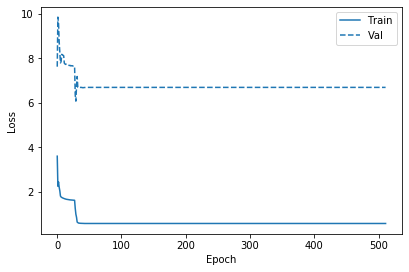

In [6]:
# Plot the training/validation history of our Keras model
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_metrics(history,  metrics =  ['loss'])

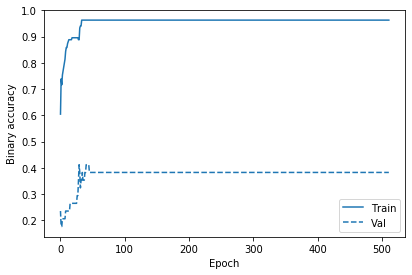

In [7]:
plot_metrics(history,  metrics =  ['binary_accuracy']) 

42/42 [==============================] - 0s 2ms/sample - loss: 2.7357 - binary_accuracy: 0.7381
loss :  2.7356965357349035

binary_accuracy :  0.7380952



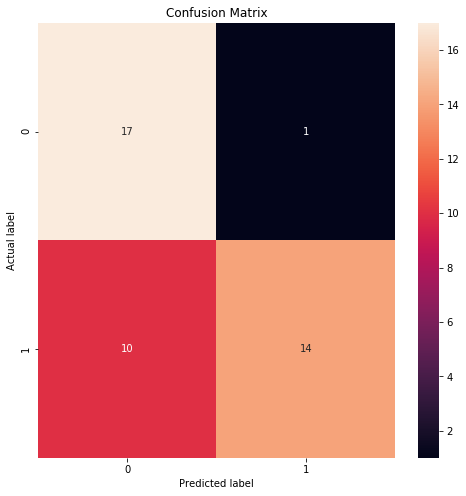

In [8]:
y_test_predictions = model.predict_classes(X_test, batch_size=1)
baseline_results = model.evaluate(X_test, y_test_one_hot,
                                  batch_size=1, verbose=1)

for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
  print()

plot_cm(y_test_one_hot, y_test_predictions)

In [10]:
# Defining various initialization parameters for 60-48-24-1 MLP model
num_classes = y_train_one_hot.shape[1]; num_features = X_train.shape[1]
num_layers_0 = 48; num_layers_1 = 24

# Define the keras model

model2 = Sequential()
model2.add(Dense(num_layers_0, input_dim=num_features, activation='relu'))
model2.add(Dense(num_layers_1, activation='relu'))

adam=keras.optimizers.Adam(learning_rate=0.05)
# Compile the keras model
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['binary_accuracy'])

# Fit keras model
history2 = model2.fit(X_train, y_train_one_hot, epochs=16, validation_split = 0.20)

ValueError: A target array with shape (168, 1) was passed for an output of shape (None, 24) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

In [15]:
plot_metrics(history2, metrics =  ['loss'])

NameError: name 'history2' is not defined

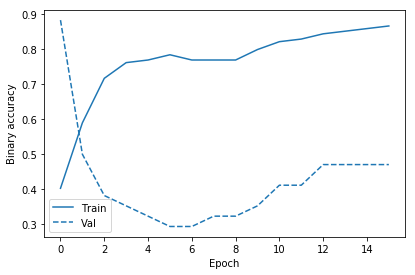

In [98]:
plot_metrics(history2, metrics =  ['binary_accuracy'])

42/42 [==============================] - 0s 1ms/step
loss :  0.4862921335512683

binary_accuracy :  0.8095238095238095



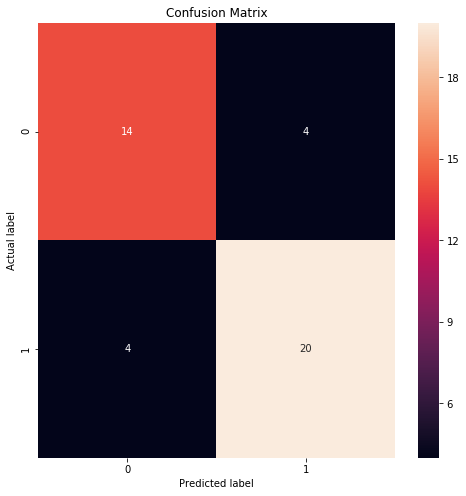

In [100]:
y_test_predictions = model2.predict_classes(X_test, batch_size=1)
baseline_results = model2.evaluate(X_test, y_test_one_hot,
                                  batch_size=1, verbose=1)

for name, value in zip(model2.metrics_names, baseline_results):
  print(name, ': ', value)
  print()

plot_cm(y_test_one_hot, y_test_predictions)